In [10]:
import time
import matplotlib.pyplot as plt
from flask import Flask
from Website.models import db, UserDynamicPreferences  # Import your SQLAlchemy models
import pandas as pd
from dotenv import load_dotenv
import os

In [11]:
load_dotenv()

True

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


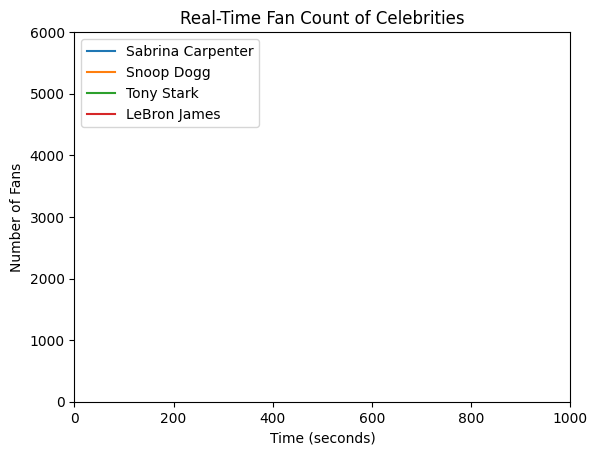

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

    current_favorite  fan_count
0         Tony Stark       2483
1  Sabrina Carpenter       2379
2       LeBron James       2522
3         Snoop Dogg       2616


<Figure size 640x480 with 0 Axes>

Real-time plot update interrupted.


In [12]:


app = Flask(__name__)
app.config['SQLALCHEMY_DATABASE_URI'] = os.getenv('DATABASE_URL')
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
db.init_app(app)

# Function to retrieve the fan count for each celebrity using SQLAlchemy
def get_fan_counts():
    # Query the database for fan counts grouped by current_favorite
    fan_counts = db.session.query(
        UserDynamicPreferences.current_favorite, db.func.count(UserDynamicPreferences.user_id).label('fan_count')
    ).group_by(UserDynamicPreferences.current_favorite).all()

    # Convert the results to a pandas DataFrame for easier manipulation
    df = pd.DataFrame(fan_counts, columns=['current_favorite', 'fan_count'])
    return df

# Function to display real-time updating line plot
def display_real_time_plot(refresh_interval=5):
    plt.ion()  # Turn on interactive mode
    fig, ax = plt.subplots()

    # Initialize the plot
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Number of Fans')
    ax.set_title('Real-Time Fan Count of Celebrities')
    ax.set_ylim(0, 6000)  # Adjust according to expected fan counts
    ax.set_xlim(0, 1000)

    # To track data over time
    time_data = []
    fan_counts_data = {celebrity: [] for celebrity in ['Sabrina Carpenter', 'Snoop Dogg', 'Tony Stark', 'LeBron James']}

    # Initialize empty plot lines for each celebrity
    lines = {}
    for celebrity in fan_counts_data.keys():
        lines[celebrity], = ax.plot([], [], label=celebrity)

    ax.legend(loc='upper left')

    try:
        start_time = time.time()
        while True:
            current_time = time.time() - start_time
            time_data.append(current_time)

            # Fetch the latest fan counts using SQLAlchemy
            df = get_fan_counts()

            print(df)  # Debugging: Print the DataFrame to see if it updates

            for celebrity in fan_counts_data.keys():
                # Check if the celebrity exists in the DataFrame, and sum the fan count
                fan_count = df[df['current_favorite'] == celebrity]['fan_count'].sum() if not df[df['current_favorite'] == celebrity].empty else 0
                fan_counts_data[celebrity].append(fan_count)

                # Update the plot data without clearing it
                lines[celebrity].set_data(time_data, fan_counts_data[celebrity])

            ax.relim()  # Recompute the limits based on the data
            ax.autoscale_view()  # Rescale the view to include the new data

            plt.draw()
            plt.pause(0.1)

            time.sleep(refresh_interval)
    except KeyboardInterrupt:
        print("Real-time plot update interrupted.")
    finally:
        plt.ioff()
        plt.show()

# Main script
if __name__ == "__main__":
    with app.app_context():  # Ensure Flask app context is available
        display_real_time_plot(refresh_interval=5)  # Update every 5 seconds
